# Laboratorium 5
## Marcin Ogórkiewicz
### 27.05.2025

### Import niezbędnych bibliotek

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import time

### Zadanie 1

Zbiór California Housing:
Liczba próbek: 20640, Liczba cech: 8
Nazwy cech: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Statystyki dla zmiennej docelowej (cena):
Średnia: 2.0686
Min: 0.1500
Max: 5.0000


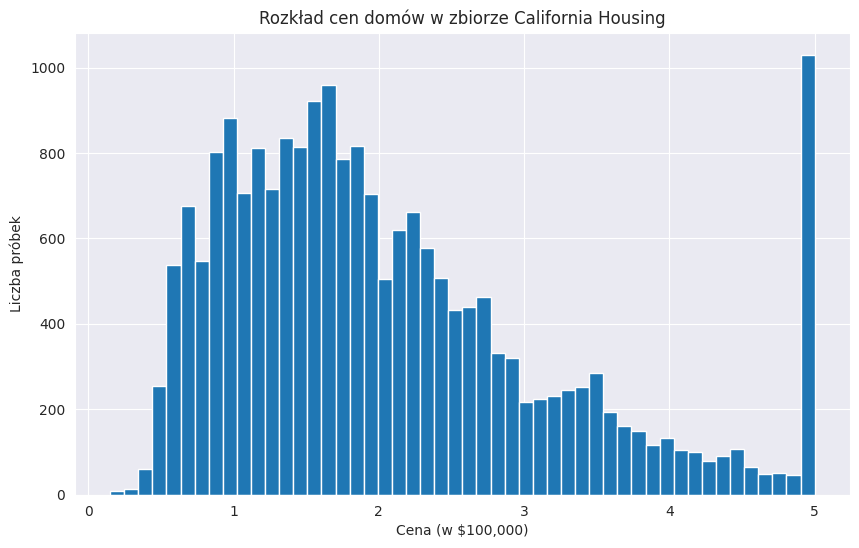


Zbiór Diabetes:
Liczba próbek: 442, Liczba cech: 10
Nazwy cech: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6

Statystyki dla zmiennej docelowej (postęp choroby):
Średnia: 152.1335
Min: 25.0000
Max: 346.0000


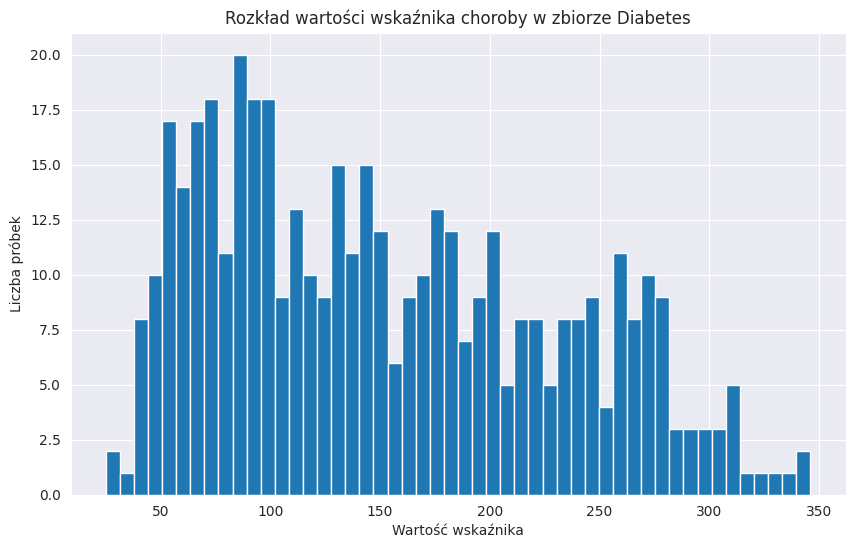

In [11]:
# Zbiór 1: California Housing
california = fetch_california_housing()
X_calif = pd.DataFrame(california.data, columns=california.feature_names)
y_calif = california.target

print("Zbiór California Housing:")
print(f"Liczba próbek: {X_calif.shape[0]}, Liczba cech: {X_calif.shape[1]}")
print(f"Nazwy cech: {', '.join(california.feature_names)}")
X_calif.head()

print("\nStatystyki dla zmiennej docelowej (cena):")
print(f"Średnia: {y_calif.mean():.4f}")
print(f"Min: {y_calif.min():.4f}")
print(f"Max: {y_calif.max():.4f}")

plt.figure(figsize=(10, 6))
plt.hist(y_calif, bins=50)
plt.title('Rozkład cen domów w zbiorze California Housing')
plt.xlabel('Cena (w $100,000)')
plt.ylabel('Liczba próbek')
plt.show()

# Podział danych na zestawy treningowe i testowe dla California Housing
X_train_calif, X_test_calif, y_train_calif, y_test_calif = train_test_split(
    X_calif, y_calif, test_size=0.2, random_state=42)

# Normalizacja danych
scaler_calif = StandardScaler()
X_train_calif_scaled = scaler_calif.fit_transform(X_train_calif)
X_test_calif_scaled = scaler_calif.transform(X_test_calif)

# Zbiór 2: Diabetes dataset z scikit-learn
diabetes = load_diabetes()
X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_diabetes = diabetes.target

print("\nZbiór Diabetes:")
print(f"Liczba próbek: {X_diabetes.shape[0]}, Liczba cech: {X_diabetes.shape[1]}")
print(f"Nazwy cech: {', '.join(diabetes.feature_names)}")
X_diabetes.head()

print("\nStatystyki dla zmiennej docelowej (postęp choroby):")
print(f"Średnia: {y_diabetes.mean():.4f}")
print(f"Min: {y_diabetes.min():.4f}")
print(f"Max: {y_diabetes.max():.4f}")

plt.figure(figsize=(10, 6))
plt.hist(y_diabetes, bins=50)
plt.title('Rozkład wartości wskaźnika choroby w zbiorze Diabetes')
plt.xlabel('Wartość wskaźnika')
plt.ylabel('Liczba próbek')
plt.show()

# Podział danych na zestawy treningowe i testowe dla Diabetes
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Normalizacja danych
scaler_diab = StandardScaler()
X_train_diab_scaled = scaler_diab.fit_transform(X_train_diab)
X_test_diab_scaled = scaler_diab.transform(X_test_diab)

### Zadanie 2

In [12]:
# Lista modeli do testowania (8 różnych modeli, w tym 5 oparte na drzewach)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("Wybrane modele regresji:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")

Wybrane modele regresji:
1. Linear Regression
2. Ridge
3. Lasso
4. Decision Tree
5. Random Forest
6. XGBoost
7. LightGBM
8. Gradient Boosting


### Zadanie 3

In [13]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test, dataset_name):
    results = {}

    for name, model in models.items():
        print(f"Trenowanie modelu {name} na zbiorze {dataset_name}...")
        start_time = time.time()

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Miary błędu
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        training_time = time.time() - start_time

        # Zapisz wyniki
        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'Training Time (s)': training_time
        }

        print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, Czas: {training_time:.2f}s\n")

    return results

# Trenowanie modeli na zbiorze California Housing
print("\n--- Trenowanie na zbiorze California Housing ---\n")
california_results = train_and_evaluate(
    models, X_train_calif_scaled, X_test_calif_scaled,
    y_train_calif, y_test_calif, 'California Housing'
)

# Trenowanie modeli na zbiorze Diabetes
print("\n--- Trenowanie na zbiorze Diabetes ---\n")
diabetes_results = train_and_evaluate(
    models, X_train_diab_scaled, X_test_diab_scaled,
    y_train_diab, y_test_diab, 'Diabetes'
)


--- Trenowanie na zbiorze California Housing ---

Trenowanie modelu Linear Regression na zbiorze California Housing...
  RMSE: 0.7456, MAE: 0.5332, R2: 0.5758, Czas: 0.01s

Trenowanie modelu Ridge na zbiorze California Housing...
  RMSE: 0.7456, MAE: 0.5332, R2: 0.5758, Czas: 0.00s

Trenowanie modelu Lasso na zbiorze California Housing...
  RMSE: 0.8244, MAE: 0.6222, R2: 0.4814, Czas: 0.05s

Trenowanie modelu Decision Tree na zbiorze California Housing...
  RMSE: 0.6442, MAE: 0.4330, R2: 0.6833, Czas: 0.17s

Trenowanie modelu Random Forest na zbiorze California Housing...
  RMSE: 0.5051, MAE: 0.3274, R2: 0.8053, Czas: 15.40s

Trenowanie modelu XGBoost na zbiorze California Housing...
  RMSE: 0.4718, MAE: 0.3096, R2: 0.8301, Czas: 1.09s

Trenowanie modelu LightGBM na zbiorze California Housing...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1

/home/marcin/PycharmProjects/arisc/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


  RMSE: 0.5422, MAE: 0.3717, R2: 0.7756, Czas: 3.97s


--- Trenowanie na zbiorze Diabetes ---

Trenowanie modelu Linear Regression na zbiorze Diabetes...
  RMSE: 53.8534, MAE: 42.7941, R2: 0.4526, Czas: 0.00s

Trenowanie modelu Ridge na zbiorze Diabetes...
  RMSE: 53.7775, MAE: 42.8120, R2: 0.4541, Czas: 0.00s

Trenowanie modelu Lasso na zbiorze Diabetes...
  RMSE: 53.7087, MAE: 42.8052, R2: 0.4555, Czas: 0.00s

Trenowanie modelu Decision Tree na zbiorze Diabetes...
  RMSE: 66.2418, MAE: 52.4512, R2: 0.1718, Czas: 0.00s

Trenowanie modelu Random Forest na zbiorze Diabetes...
  RMSE: 54.3984, MAE: 44.1712, R2: 0.4415, Czas: 0.27s

Trenowanie modelu XGBoost na zbiorze Diabetes...
  RMSE: 57.8878, MAE: 46.3890, R2: 0.3675, Czas: 0.08s

Trenowanie modelu LightGBM na zbiorze Diabetes...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

/home/marcin/PycharmProjects/arisc/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Zadanie 4


--- Wyniki dla zbioru California Housing ---



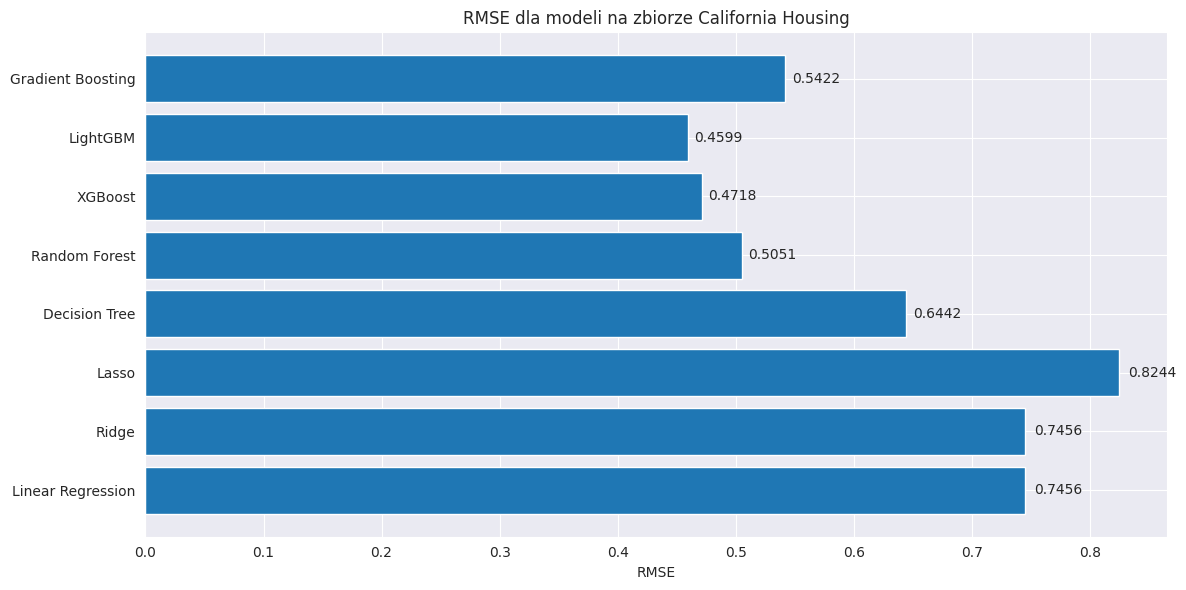

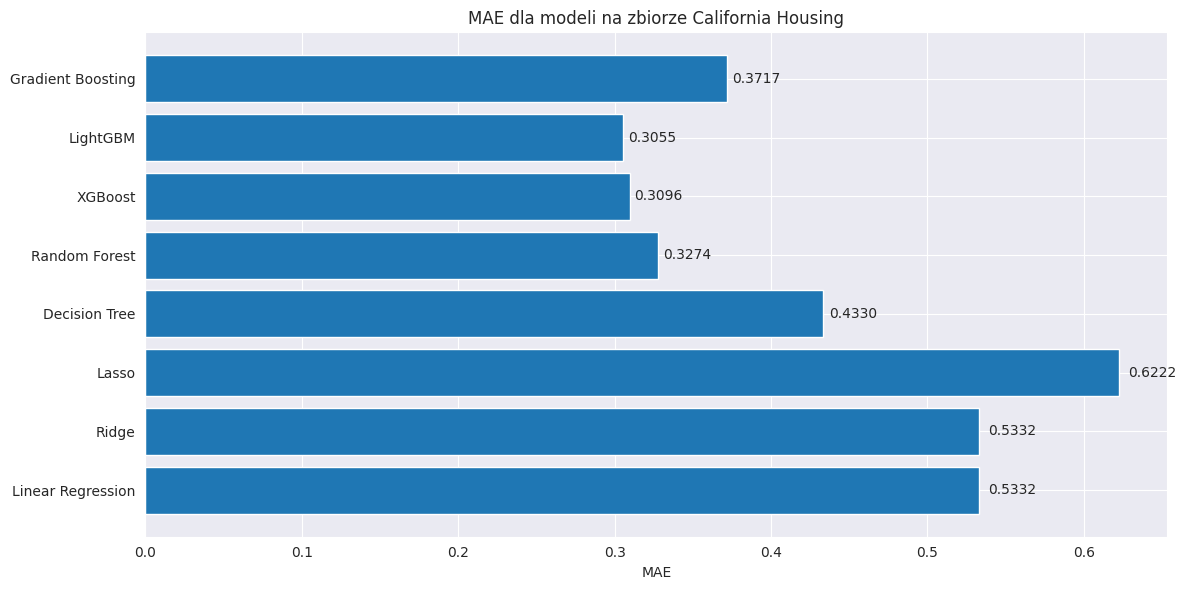

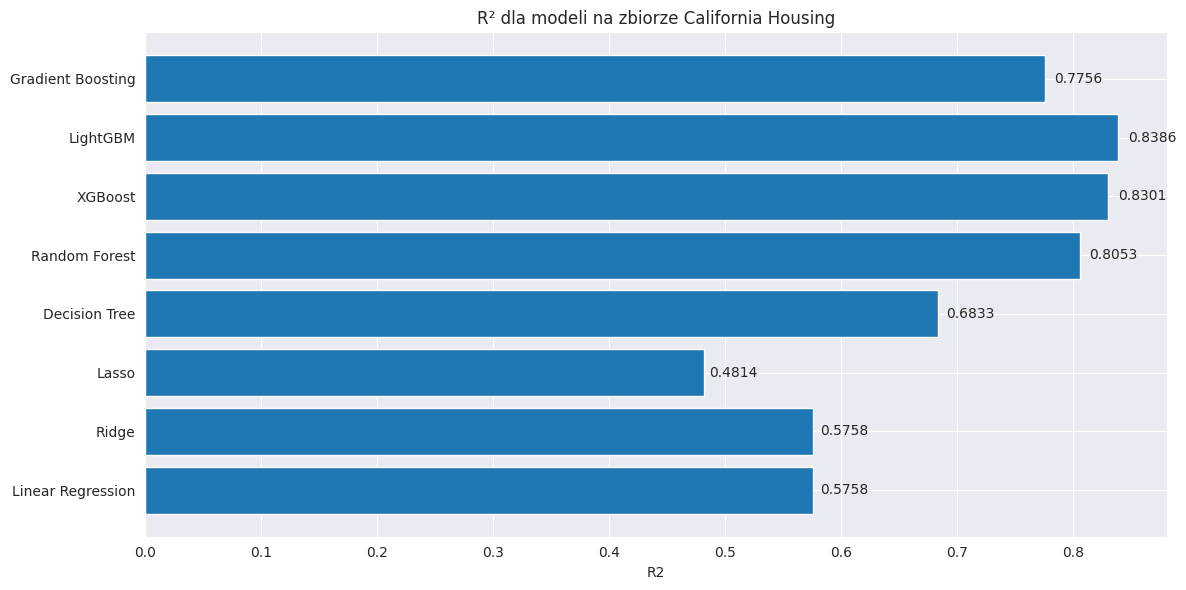

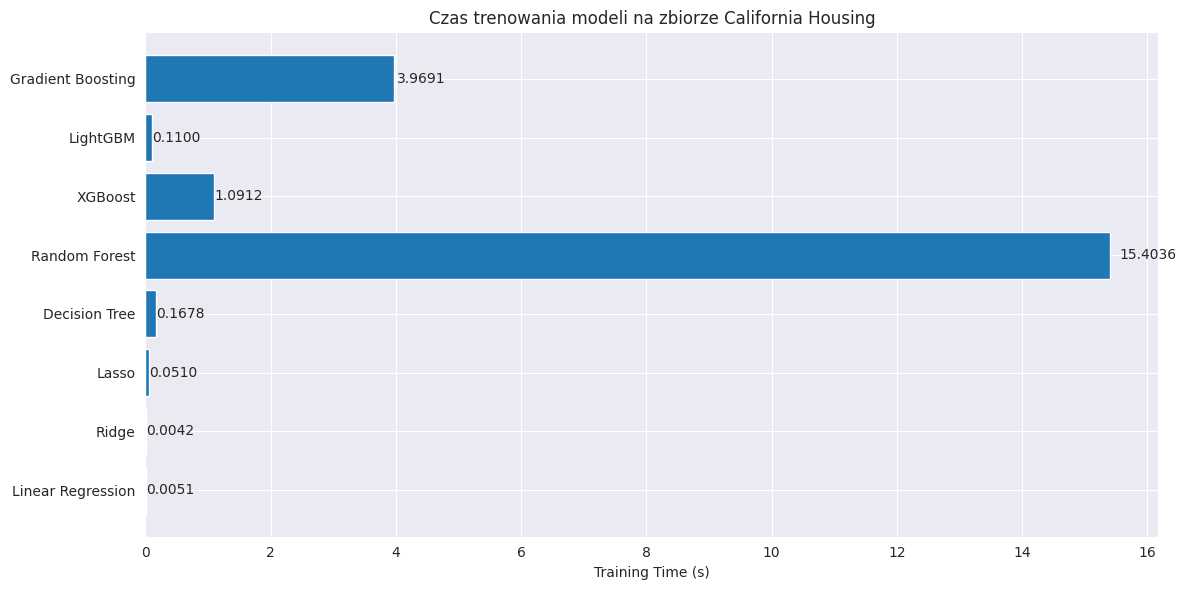

Tabela wyników dla zbioru California Housing:


,MSE,RMSE,MAE,R2,Training Time (s)
Linear Regression,0.555892,0.745581,0.533200,0.575788,0.005095
Ridge,0.555855,0.745557,0.533193,0.575816,0.004237
Lasso,0.679629,0.824396,0.622201,0.481361,0.051017
Decision Tree,0.415048,0.644242,0.433044,0.683269,0.167753
Random Forest,0.255170,0.505143,0.327425,0.805275,15.403598
XGBoost,0.222590,0.471794,0.309573,0.830137,1.091152
LightGBM,0.211487,0.459877,0.305458,0.838610,0.110026
Gradient Boosting,0.293999,0.542217,0.371650,0.775643,3.969121


Najlepszy model według R² dla California Housing: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


/home/marcin/PycharmProjects/arisc/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


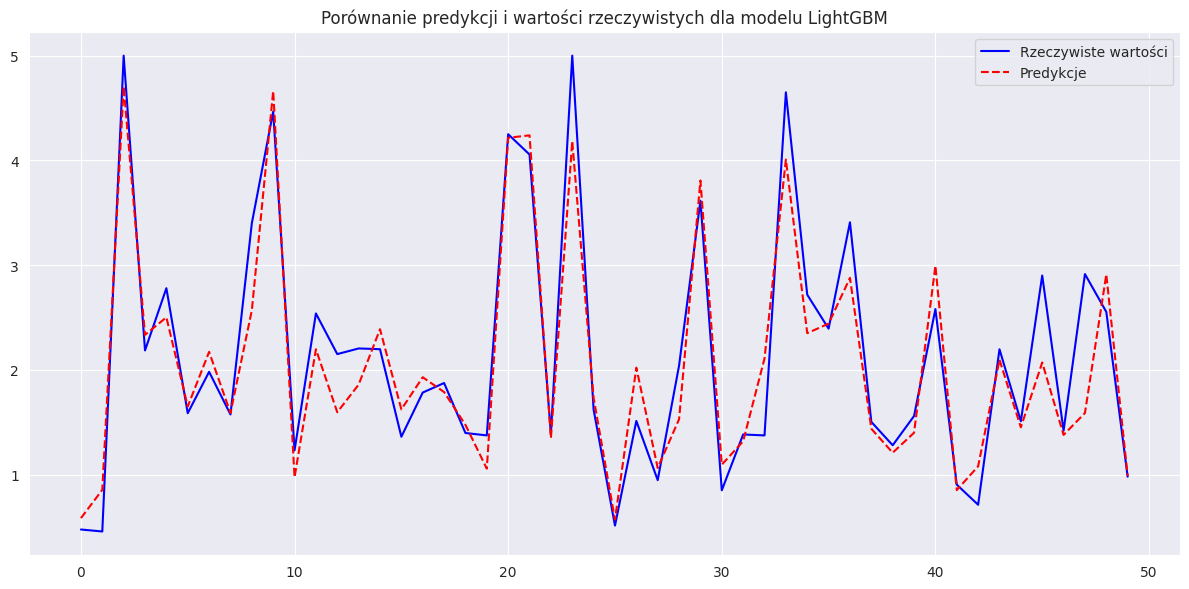


--- Wyniki dla zbioru Diabetes ---



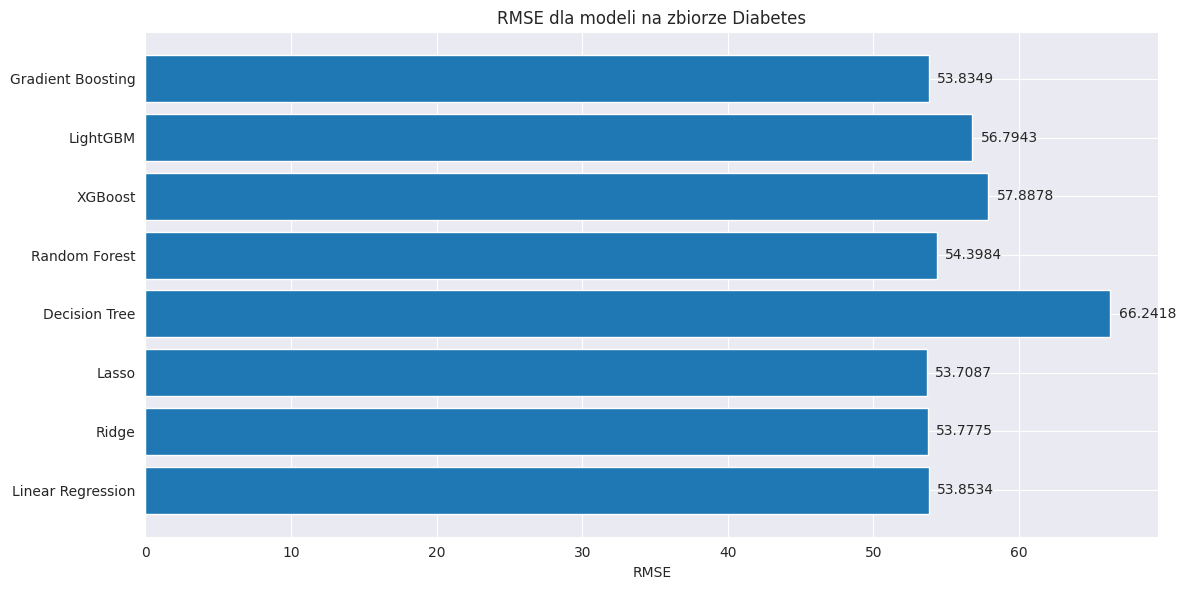

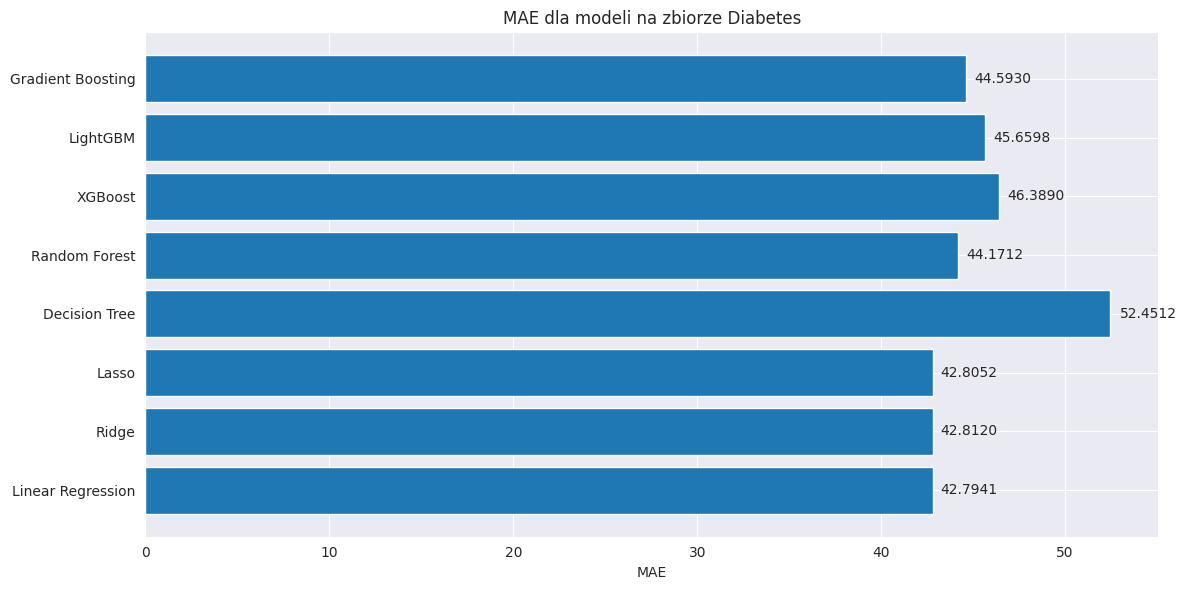

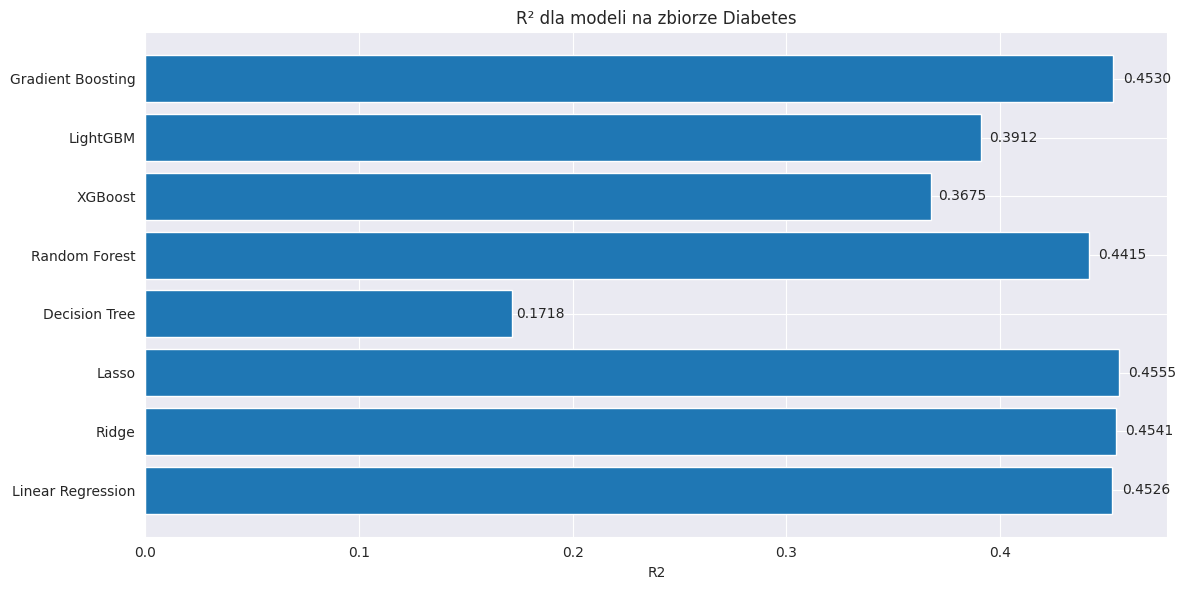

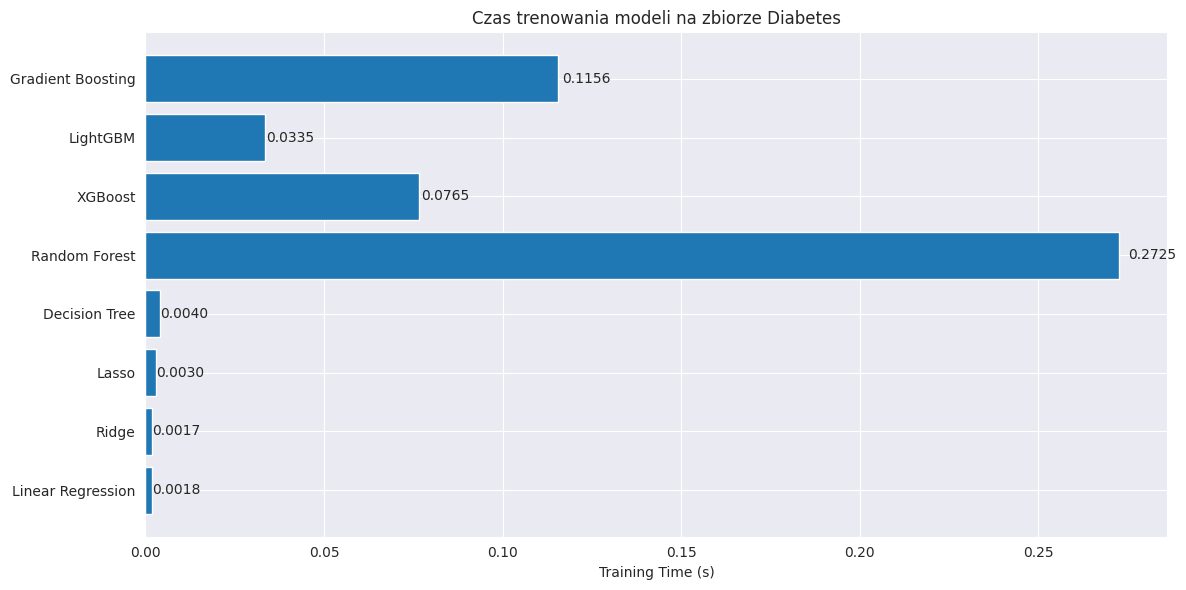

Tabela wyników dla zbioru Diabetes:


,MSE,RMSE,MAE,R2,Training Time (s)
Linear Regression,2900.193628,53.853446,42.794095,0.452603,0.001756
Ridge,2892.014566,53.777454,42.811999,0.454147,0.001708
Lasso,2884.624289,53.708698,42.805234,0.455541,0.003013
Decision Tree,4387.981197,66.241839,52.451158,0.171790,0.003988
Random Forest,2959.180562,54.398351,44.171236,0.441469,0.272521
XGBoost,3351.001638,57.887837,46.388966,0.367515,0.076468
LightGBM,3225.589065,56.794270,45.659811,0.391186,0.033481
Gradient Boosting,2898.198135,53.834916,44.593020,0.452979,0.115582


Najlepszy model według R² dla Diabetes: Lasso


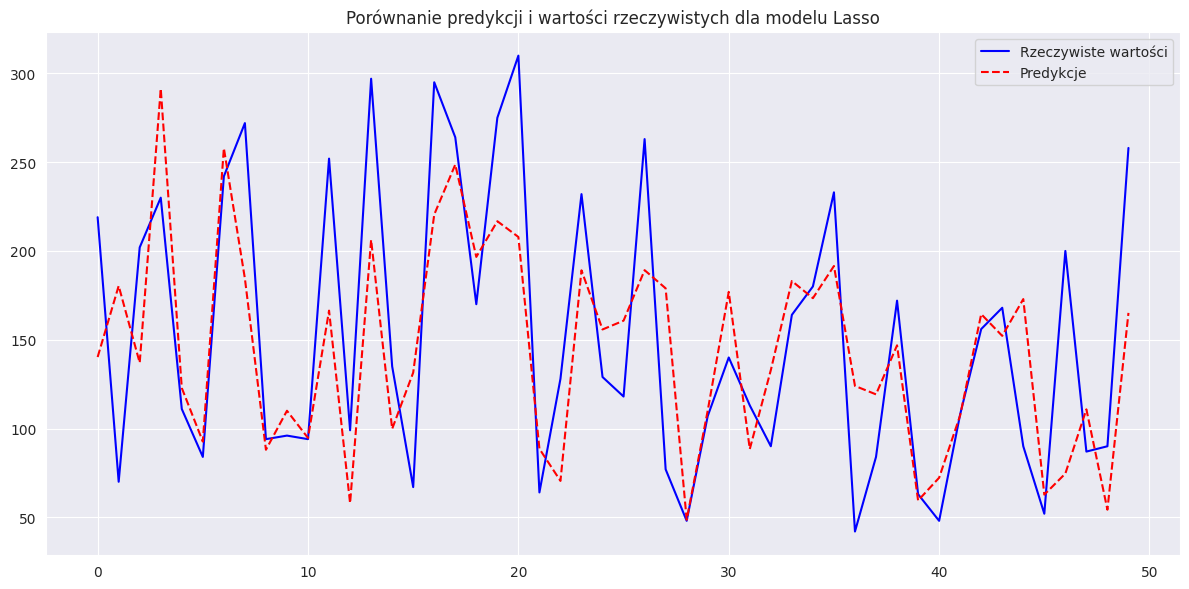

In [14]:
# Funkcja do tworzenia wykresu słupkowego dla wybranych metryk
def plot_metrics(results, metric, title):
    names = list(results.keys())
    values = [results[name][metric] for name in names]

    plt.figure(figsize=(12, 6))
    bars = plt.barh(names, values)
    plt.xlabel(metric)
    plt.title(title)

    # Dodaj wartości na końcach słupków
    for bar in bars:
        width = bar.get_width()
        plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
                f'{width:.4f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()

# Funkcja do porównania predykcji z rzeczywistymi wartościami
def compare_predictions(model_name, models, X_train, X_test, y_train, y_test, limit=50):
    model = clone(models[model_name])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(12, 6))
    plt.plot(range(limit), y_test[:limit], 'b-', label='Rzeczywiste wartości')
    plt.plot(range(limit), y_pred[:limit], 'r--', label='Predykcje')
    plt.title(f'Porównanie predykcji i wartości rzeczywistych dla modelu {model_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Wizualizacje dla zbioru California Housing
print("\n--- Wyniki dla zbioru California Housing ---\n")
plot_metrics(california_results, 'RMSE', 'RMSE dla modeli na zbiorze California Housing')
plot_metrics(california_results, 'MAE', 'MAE dla modeli na zbiorze California Housing')
plot_metrics(california_results, 'R2', 'R² dla modeli na zbiorze California Housing')
plot_metrics(california_results, 'Training Time (s)', 'Czas trenowania modeli na zbiorze California Housing')

# Tabela wyników dla California Housing
calif_results_df = pd.DataFrame({model: pd.Series(metrics) for model, metrics in california_results.items()})
calif_results_df = calif_results_df.transpose()
print("Tabela wyników dla zbioru California Housing:")
display(calif_results_df)

# Porównanie predykcji najlepszego modelu dla California Housing
best_model_calif = calif_results_df['R2'].idxmax()
print(f"Najlepszy model według R² dla California Housing: {best_model_calif}")
compare_predictions(best_model_calif, models,
                   X_train_calif_scaled, X_test_calif_scaled,
                   y_train_calif, y_test_calif)

# Wizualizacje dla zbioru Diabetes
print("\n--- Wyniki dla zbioru Diabetes ---\n")
plot_metrics(diabetes_results, 'RMSE', 'RMSE dla modeli na zbiorze Diabetes')
plot_metrics(diabetes_results, 'MAE', 'MAE dla modeli na zbiorze Diabetes')
plot_metrics(diabetes_results, 'R2', 'R² dla modeli na zbiorze Diabetes')
plot_metrics(diabetes_results, 'Training Time (s)', 'Czas trenowania modeli na zbiorze Diabetes')

# Tabela wyników dla Diabetes
diab_results_df = pd.DataFrame({model: pd.Series(metrics) for model, metrics in diabetes_results.items()})
diab_results_df = diab_results_df.transpose()
print("Tabela wyników dla zbioru Diabetes:")
display(diab_results_df)

# Porównanie predykcji najlepszego modelu dla Diabetes
best_model_diab = diab_results_df['R2'].idxmax()
print(f"Najlepszy model według R² dla Diabetes: {best_model_diab}")
compare_predictions(best_model_diab, models,
                   X_train_diab_scaled, X_test_diab_scaled,
                   y_train_diab, y_test_diab)

### Wnioski
Do testów wybrałem modele:
- **Linear Regression** - klasyczna regresja liniowa.
- **Ridge** - regresja grzbietowa, która dodaje karę L2 do funkcji kosztu.
- **Lasso** - regresja Lasso, która dodaje karę L1 do funkcji kosztu.
- **Decision Tree** - regresja oparta na drzewach decyzyjnych.
- **Random Forest** - ensemble drzew decyzyjnych, które poprawia stabilność i dokładność.
- **XGBoost** - gradient boosting, który jest bardzo wydajny i często daje najlepsze wyniki.
- **LightGBM** - inny wariant gradient boosting, zoptymalizowany pod kątem szybkości i wydajności.
- **Gradient Boosting** - klasyczny gradient boosting, który jest bardziej interpretowalny niż XGBoost i LightGBM.<br>





Wyniki pokazują, że modele oparte na drzewach radzą sobie najlepiej na danych nieliniowych, w naszym wypadku California Housing, natomiast modele liniowe są bardziej wydajne na danych liniowych, takich jak zbiór Diabetes